# Table of Contents
 <p><div class="lev1 toc-item"><a href="#An-example-of-a-small-Multi-Player-simulation,-with-Centralized-Algorithms" data-toc-modified-id="An-example-of-a-small-Multi-Player-simulation,-with-Centralized-Algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>An example of a small Multi-Player simulation, with Centralized Algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-problem" data-toc-modified-id="Creating-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the problem</a></div><div class="lev3 toc-item"><a href="#Parameters-for-the-simulation" data-toc-modified-id="Parameters-for-the-simulation-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Parameters for the simulation</a></div><div class="lev3 toc-item"><a href="#Three-MAB-problems-with-Bernoulli-arms" data-toc-modified-id="Three-MAB-problems-with-Bernoulli-arms-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Three MAB problems with Bernoulli arms</a></div><div class="lev3 toc-item"><a href="#Some-RL-algorithms" data-toc-modified-id="Some-RL-algorithms-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Some RL algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-EvaluatorMultiPlayers-objects" data-toc-modified-id="Creating-the-EvaluatorMultiPlayers-objects-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the <code>EvaluatorMultiPlayers</code> objects</a></div><div class="lev2 toc-item"><a href="#Solving-the-problem" data-toc-modified-id="Solving-the-problem-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Solving the problem</a></div><div class="lev2 toc-item"><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting the results</a></div><div class="lev3 toc-item"><a href="#First-problem" data-toc-modified-id="First-problem-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>First problem</a></div><div class="lev3 toc-item"><a href="#Second-problem" data-toc-modified-id="Second-problem-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Second problem</a></div><div class="lev3 toc-item"><a href="#Third-problem" data-toc-modified-id="Third-problem-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Third problem</a></div><div class="lev3 toc-item"><a href="#Comparing-their-performances" data-toc-modified-id="Comparing-their-performances-144"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Comparing their performances</a></div>

---
# An example of a small Multi-Player simulation, with Centralized Algorithms

First, be sure to be in the main folder, or to have [SMPyBandits](https://github.com/SMPyBandits/SMPyBandits) installed, and import `EvaluatorMultiPlayers` from `Environment` package:

In [1]:
!pip install SMPyBandits watermark
%load_ext watermark
%watermark -v -m -p SMPyBandits -a "Lilian Besson"

Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...
Lilian Besson 

CPython 3.6.6
IPython 7.1.1

SMPyBandits 0.9.4

compiler   : GCC 8.0.1 20180414 (experimental) [trunk revision 259383
system     : Linux
release    : 4.15.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
# Local imports
from SMPyBandits.Environment import EvaluatorMultiPlayers, tqdm

We also need arms, for instance `Bernoulli`-distributed arm:

In [3]:
# Import arms
from SMPyBandits.Arms import Bernoulli

And finally we need some single-player and multi-player Reinforcement Learning algorithms:

In [4]:
# Import algorithms
from SMPyBandits.Policies import *
from SMPyBandits.PoliciesMultiPlayers import *

In [5]:
# Just improving the ?? in Jupyter. Thanks to https://nbviewer.jupyter.org/gist/minrk/7715212
from __future__ import print_function
from IPython.core import page
def myprint(s):
    try:
        print(s['text/plain'])
    except (KeyError, TypeError):
        print(s)
page.page = myprint

For instance, this imported the `UCB` algorithm:

In [6]:
UCBalpha?

Init signature: UCBalpha(nbArms, alpha=4, lower=0.0, amplitude=1.0)
Docstring:     
The UCB1 (UCB-alpha) index policy, modified to take a random permutation order for the initial exploration of each arm (reduce collisions in the multi-players setting).
Reference: [Auer et al. 02].
Init docstring:
New generic index policy.

- nbArms: the number of arms,
- lower, amplitude: lower value and known amplitude of the rewards.
File:           /tmp/SMPyBandits/notebooks/venv3/lib/python3.6/site-packages/SMPyBandits/Policies/UCBalpha.py
Type:           type



As well as the `CentralizedMultiplePlay` multi-player policy:

In [7]:
CentralizedMultiplePlay?

Init signature: CentralizedMultiplePlay(nbPlayers, nbArms, playerAlgo, uniformAllocation=False, *args, **kwargs)
Docstring:     
CentralizedMultiplePlay: a multi-player policy where ONE policy is used by a centralized agent; asking the policy to select nbPlayers arms at each step.
    
Init docstring:
- nbPlayers: number of players to create (in self._players).
- playerAlgo: class to use for every players.
- nbArms: number of arms, given as first argument to playerAlgo.
- uniformAllocation: Should the affectations of users always be uniform, or fixed when UCB indexes have converged? First choice is more fair, but linear nb of switches, second choice is not fair, but cst nb of switches.
- `*args`, `**kwargs`: arguments, named arguments, given to playerAlgo.

Examples:

>>> import sys; sys.path.insert(0, '..'); from Policies import *
>>> s = CentralizedMultiplePlay(2, 3, UCB)
>>> [ child.choice() for child in s.children ]
[2, 0]

- To get a list of usable players, use ``s.children``.
- W

We also need a collision model. The usual ones are defined in the `CollisionModels` package, and the only one we need is the classical one, where two or more colliding users don't receive any rewards.

In [8]:
# Collision Models
from SMPyBandits.Environment.CollisionModels import onlyUniqUserGetsReward

onlyUniqUserGetsReward?

Signature: onlyUniqUserGetsReward(t, arms, players, choices, rewards, pulls, collisions)
Docstring:
Simple collision model where only the players alone on one arm samples it and receives the reward.

- This is the default collision model, cf. [[Multi-Player Bandits Revisited, Lilian Besson and Emilie Kaufmann, 2017]](https://hal.inria.fr/hal-01629733).
- The numpy array 'choices' is increased according to the number of users who collided (it is NOT binary).
File:      /tmp/SMPyBandits/notebooks/venv3/lib/python3.6/site-packages/SMPyBandits/Environment/CollisionModels.py
Type:      function



---
## Creating the problem

### Parameters for the simulation
- $T = 10000$ is the time horizon,
- $N = 100$ is the number of repetitions (should be larger to have consistent results),
- $M = 2$ is the number of players,
- `N_JOBS = 4` is the number of cores used to parallelize the code.

In [9]:
HORIZON = 10000
REPETITIONS = 100
NB_PLAYERS = 2
N_JOBS = 4
collisionModel = onlyUniqUserGetsReward

### Three MAB problems with Bernoulli arms
We consider in this example $3$ problems, with `Bernoulli` arms, of different means.

1. The first problem is very easy, with two good arms and three arms, with a fixed gap $\Delta = \max_{\mu_i \neq \mu_j}(\mu_{i} - \mu_{j}) = 0.1$.
2. The second problem is as easier, with a larger gap.
3. Third problem is harder, with a smaller gap, and a very large difference between the two optimal arms and the suboptimal arms.

> Note: right now, the multi-environments evaluator does not work well for MP policies, if there is a number different of arms in the scenarios. So I use the same number of arms in all the problems.

In [10]:
ENVIRONMENTS = [  # 1)  Bernoulli arms
        {   # Scenario 1 from [Komiyama, Honda, Nakagawa, 2016, arXiv 1506.00779]
            "arm_type": Bernoulli,
            "params": [0.3, 0.4, 0.5, 0.6, 0.7]
        },
        {   # Classical scenario
             "arm_type": Bernoulli,
             "params": [0.1, 0.3, 0.5, 0.7, 0.9]
        },
        {   # Harder scenario
             "arm_type": Bernoulli,
             "params": [0.005, 0.01, 0.015, 0.84, 0.85]
        }
    ]

### Some RL algorithms
We will compare Thompson Sampling against $\mathrm{UCB}_1$, using two different centralized policy:

1. `CentralizedMultiplePlay` is the naive use of a Bandit algorithm for Multi-Player decision making: at every step, the internal decision making process is used to determine not $1$ arm but $M$ to sample. For UCB-like algorithm, the decision making is based on a $\arg\max$ on UCB-like indexes, usually of the form $I_j(t) = X_j(t) + B_j(t)$, where $X_j(t) = \hat{\mu_j}(t) = \sum_{\tau \leq t} r_j(\tau) / N_j(t)$ is the empirical mean of arm $j$, and $B_j(t)$ is a bias term, of the form $B_j(t) = \sqrt{\frac{\alpha \log(t)}{2 N_j(t)}}$.

2. `CentralizedIMP` is very similar, but instead of following the internal decision making for all the decisions, the system uses just the empirical means $X_j(t)$ to determine $M-1$ arms to sample, and the bias-corrected term (i.e., the internal decision making, can be sampling from a Bayesian posterior for instance) is used just for one decision. It is an heuristic, proposed in [[Komiyama, Honda, Nakagawa, 2016]](https://arxiv.org/abs/1506.00779).

In [12]:
nbArms = len(ENVIRONMENTS[0]['params'])
assert all(len(env['params']) == nbArms for env in ENVIRONMENTS), "Error: not yet support if different environments have different nb of arms"
nbArms

SUCCESSIVE_PLAYERS = [
    CentralizedMultiplePlay(NB_PLAYERS, nbArms, UCBalpha, alpha=1).children,
    CentralizedIMP(NB_PLAYERS, nbArms, UCBalpha, alpha=1).children,
    CentralizedMultiplePlay(NB_PLAYERS, nbArms, Thompson).children,
    CentralizedIMP(NB_PLAYERS, nbArms, Thompson).children
]
SUCCESSIVE_PLAYERS

5

 - One new child, of index 0, and class #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
 - One new child, of index 1, and class #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
 - One new child, of index 0, and class #1<CentralizedIMP(UCB($\alpha=1$))> ...
 - One new child, of index 1, and class #2<CentralizedIMP(UCB($\alpha=1$))> ...
 - One new child, of index 0, and class #1<CentralizedMultiplePlay(Thompson)> ...
 - One new child, of index 1, and class #2<CentralizedMultiplePlay(Thompson)> ...
 - One new child, of index 0, and class #1<CentralizedIMP(Thompson)> ...
 - One new child, of index 1, and class #2<CentralizedIMP(Thompson)> ...


[[CentralizedMultiplePlay(UCB($\alpha=1$)),
  CentralizedMultiplePlay(UCB($\alpha=1$))],
 [CentralizedIMP(UCB($\alpha=1$)), CentralizedIMP(UCB($\alpha=1$))],
 [CentralizedMultiplePlay(Thompson), CentralizedMultiplePlay(Thompson)],
 [CentralizedIMP(Thompson), CentralizedIMP(Thompson)]]

The mother class in this case does all the job here, as we use centralized learning.

In [13]:
OnePlayer = SUCCESSIVE_PLAYERS[0][0]
OnePlayer.nbArms

OneMother = OnePlayer.mother
OneMother
OneMother.nbArms

5

5

Complete configuration for the problem:

In [14]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Collision model
    "collisionModel": onlyUniqUserGetsReward,
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "successive_players": SUCCESSIVE_PLAYERS,
}

---
## Creating the `EvaluatorMultiPlayers` objects
We will need to create several objects, as the simulation first runs one policy against each environment, and then aggregate them to compare them.

In [15]:
%%time
N_players = len(configuration["successive_players"])

# List to keep all the EvaluatorMultiPlayers objects
evs = [None] * N_players
evaluators = [[None] * N_players] * len(configuration["environment"])

for playersId, players in tqdm(enumerate(configuration["successive_players"]), desc="Creating"):
    print("\n\nConsidering the list of players :\n", players)
    conf = configuration.copy()
    conf['players'] = players
    evs[playersId] = EvaluatorMultiPlayers(conf)



Considering the list of players :
 [CentralizedMultiplePlay(UCB($\alpha=1$)), CentralizedMultiplePlay(UCB($\alpha=1$))]
Number of players in the multi-players game: 2
Time horizon: 10000
Number of repetitions: 100
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 4
Using collision model onlyUniqUserGetsReward (function <function onlyUniqUserGetsReward at 0x7fc672469bf8>).
More details:
 Simple collision model where only the players alone on one arm samples it and receives the reward.

    - This is the default collision model, cf. [[Multi-Player Bandits Revisited, Lilian Besson and Emilie Kaufmann, 2017]](https://hal.inria.fr/hal-01629733).
    - The numpy array 'choices' is increased according to the number of users who collided (it is NOT binary).
    
Using accurate regrets and last regrets ? True


Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Ber

##  Solving the problem
Now we can simulate the $2$ environments, for the successive policies. That part can take some time.

In [16]:
%%time
for playersId, evaluation in tqdm(enumerate(evs), desc="Policies"):
    for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
        # Evaluate just that env
        evaluation.startOneEnv(envId, env)
        # Storing it after simulation is done
        evaluators[envId][playersId] = evaluation



Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
- Adding player # 2 = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.4min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
- Adding player # 2 = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   47.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.7min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
- Adding player # 2 = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   55.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.8min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedIMP(UCB($\alpha=1$))> ...
- Adding player # 2 = #2<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedIMP(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   19.6s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  3.6min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedIMP(UCB($\alpha=1$))> ...
- Adding player # 2 = #2<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedIMP(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   23.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  3.7min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedIMP(UCB($\alpha=1$))> ...
- Adding player # 2 = #2<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedIMP(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  3.8min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(Thompson)> ...
- Adding player # 2 = #2<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(Thompson)> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   47.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.7min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(Thompson)> ...
- Adding player # 2 = #2<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(Thompson)> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   45.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.7min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(Thompson)> ...
- Adding player # 2 = #2<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(Thompson)> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.7min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedIMP(Thompson)> ...
- Adding player # 2 = #2<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedIMP(Thompson)> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.8min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedIMP(Thompson)> ...
- Adding player # 2 = #2<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedIMP(Thompson)> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.0min finished




Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedIMP(Thompson)> ...
- Adding player # 2 = #2<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedIMP(Thompson)> ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   57.2s finished



CPU times: user 2min 45s, sys: 913 ms, total: 2min 46s
Wall time: 27min 44s


## Plotting the results
And finally, visualize them, with the plotting method of a `EvaluatorMultiPlayers` object:

In [24]:
def plotAll(evaluation, envId):
    evaluation.printFinalRanking(envId)
    # Rewards
    evaluation.plotRewards(envId)
    # Fairness
    #evaluation.plotFairness(envId, fairness="STD")
    # Centralized regret
    evaluation.plotRegretCentralized(envId, subTerms=True)
    #evaluation.plotRegretCentralized(envId, semilogx=True, subTerms=True)
    # Number of switches
    #evaluation.plotNbSwitchs(envId, cumulated=False)
    evaluation.plotNbSwitchs(envId, cumulated=True)
    # Frequency of selection of the best arms
    evaluation.plotBestArmPulls(envId)
    # Number of collisions - not for Centralized* policies
    #evaluation.plotNbCollisions(envId, cumulated=False)
    #evaluation.plotNbCollisions(envId, cumulated=True)
    # Frequency of collision in each arm
    #evaluation.plotFrequencyCollisions(envId, piechart=True)

In [25]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.4, 7)

### First problem
$\mu = [0.3, 0.4, 0.5, 0.6, 0.7]$ was an easy Bernoulli problem.


Final ranking for this environment # 0 : CentralizedMultiplePlay(UCB($\alpha=1$)) ...
- Player # 2 / 2, CentralizedMultiplePlay(UCB($\alpha=1$))	was ranked	1 / 2 for this simulation (last rewards = 6516.6).
- Player # 1 / 2, CentralizedMultiplePlay(UCB($\alpha=1$))	was ranked	2 / 2 for this simulation (last rewards = 6346.1).


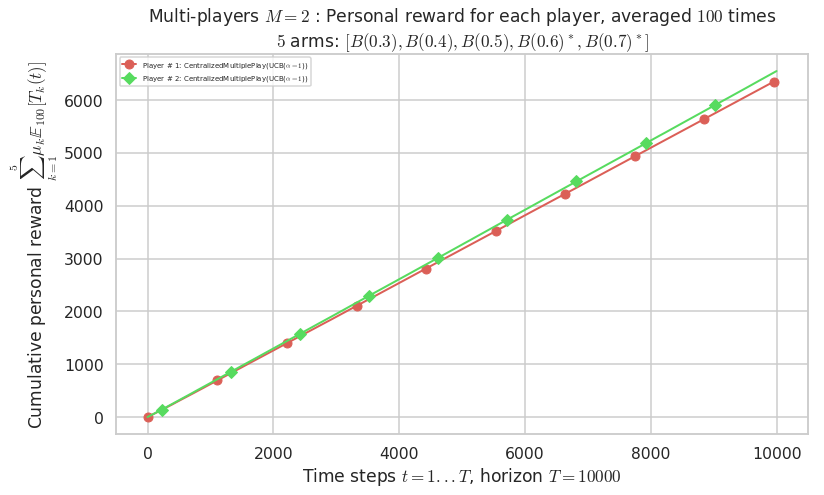

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


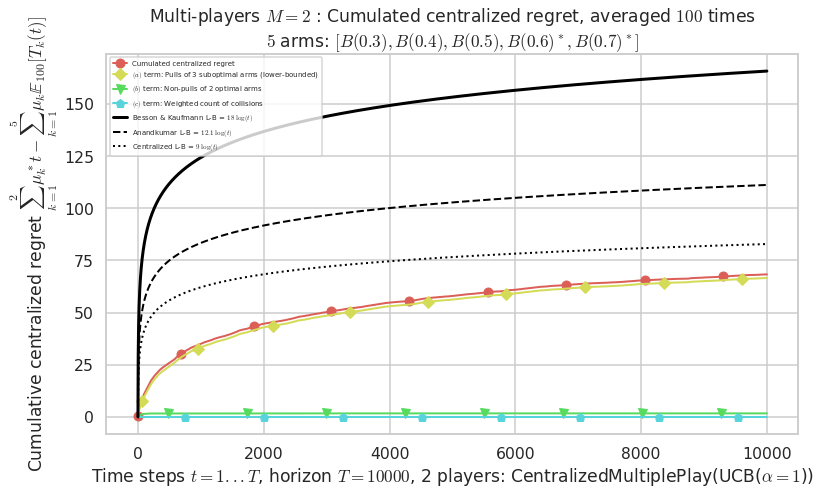

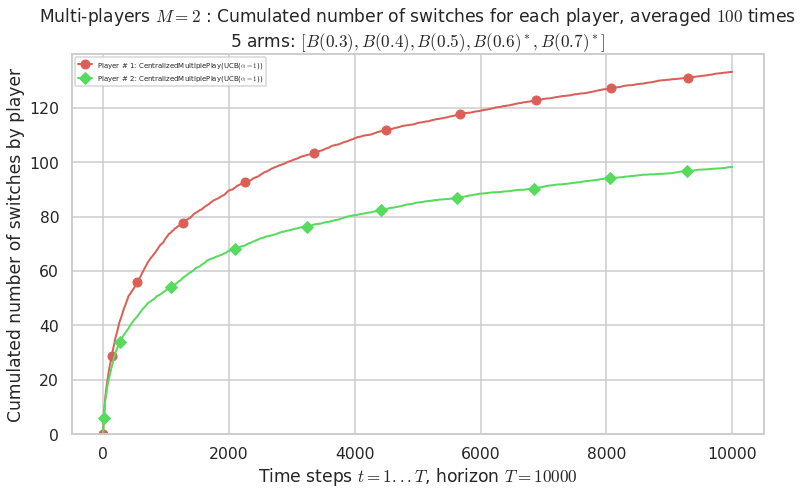

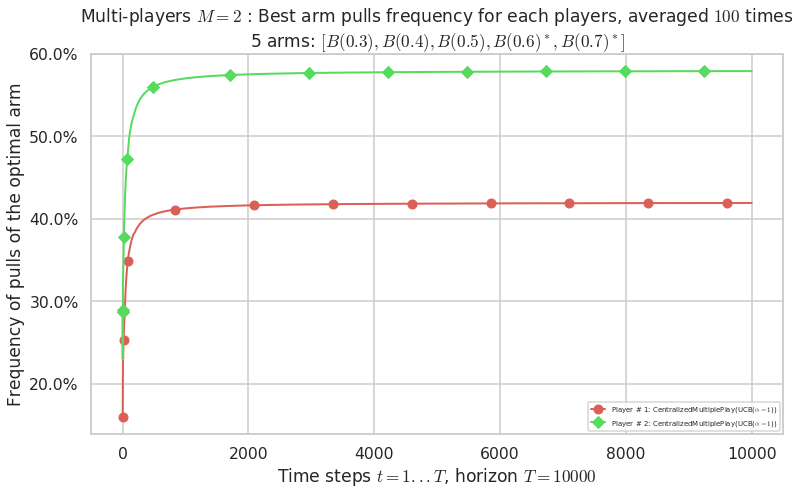


Final ranking for this environment # 0 : CentralizedIMP(UCB($\alpha=1$)) ...
- Player # 2 / 2, CentralizedIMP(UCB($\alpha=1$))	was ranked	1 / 2 for this simulation (last rewards = 6464.3).
- Player # 1 / 2, CentralizedIMP(UCB($\alpha=1$))	was ranked	2 / 2 for this simulation (last rewards = 6400.6).


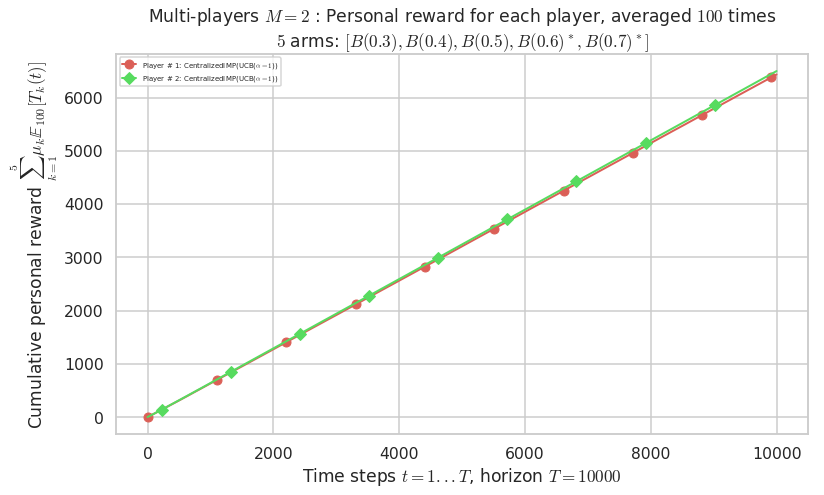

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


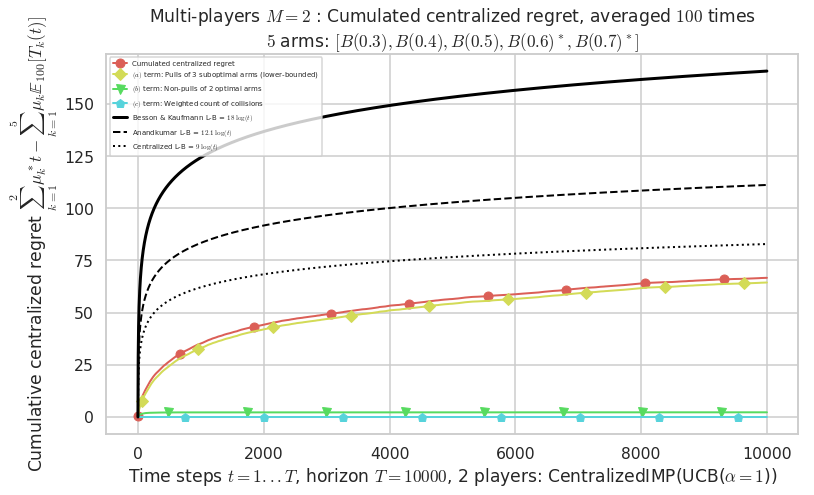

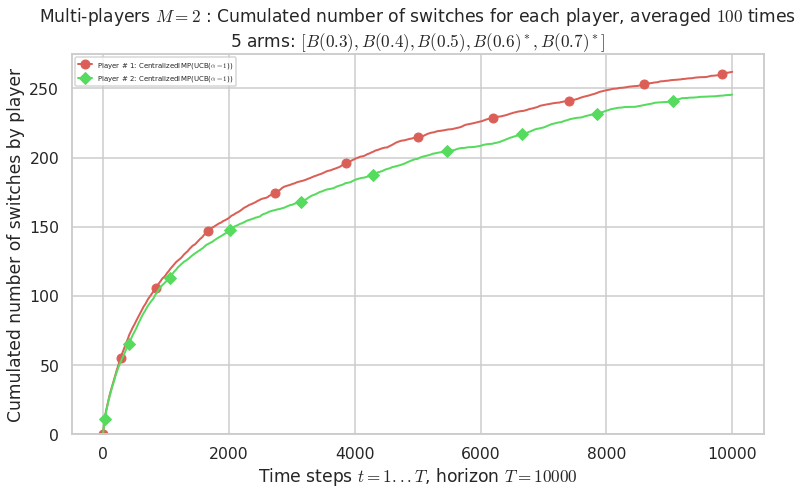

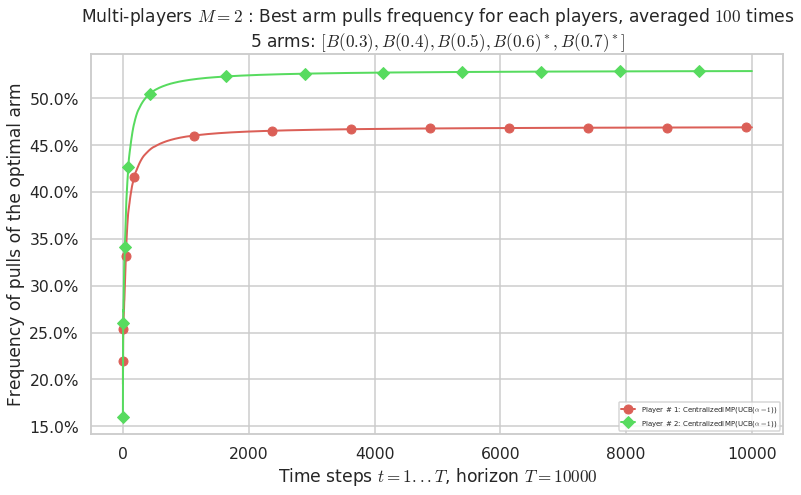


Final ranking for this environment # 0 : CentralizedMultiplePlay(Thompson) ...
- Player # 1 / 2, CentralizedMultiplePlay(Thompson)	was ranked	1 / 2 for this simulation (last rewards = 6495.3).
- Player # 2 / 2, CentralizedMultiplePlay(Thompson)	was ranked	2 / 2 for this simulation (last rewards = 6394).


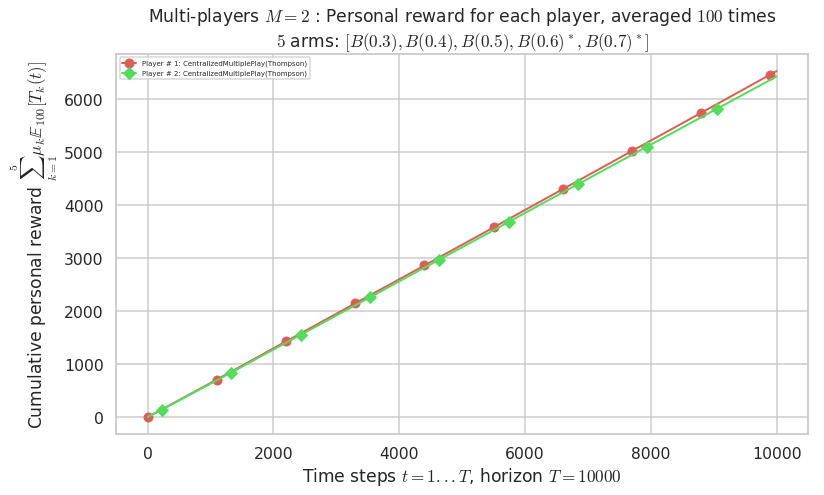

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


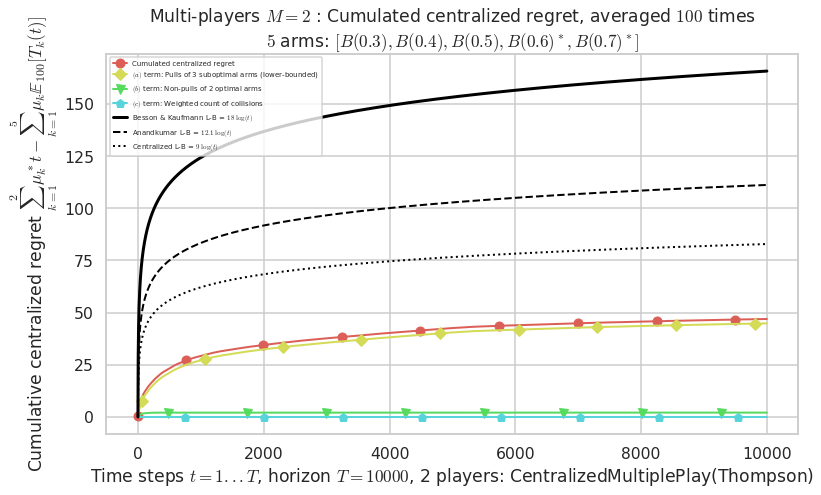

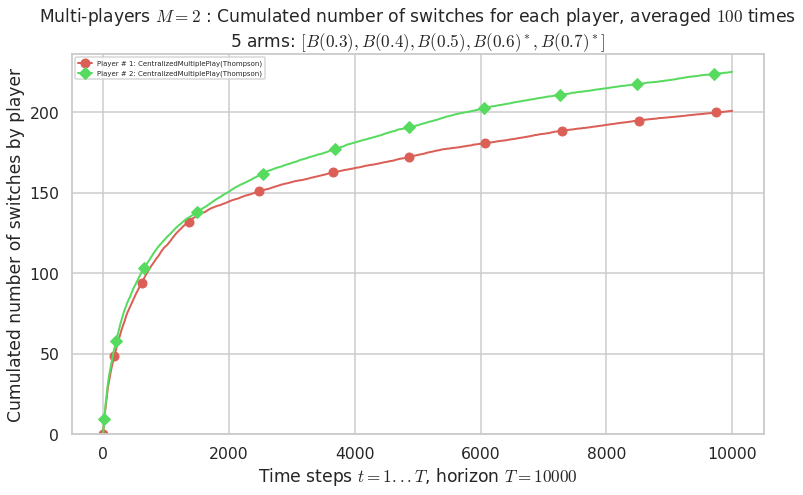

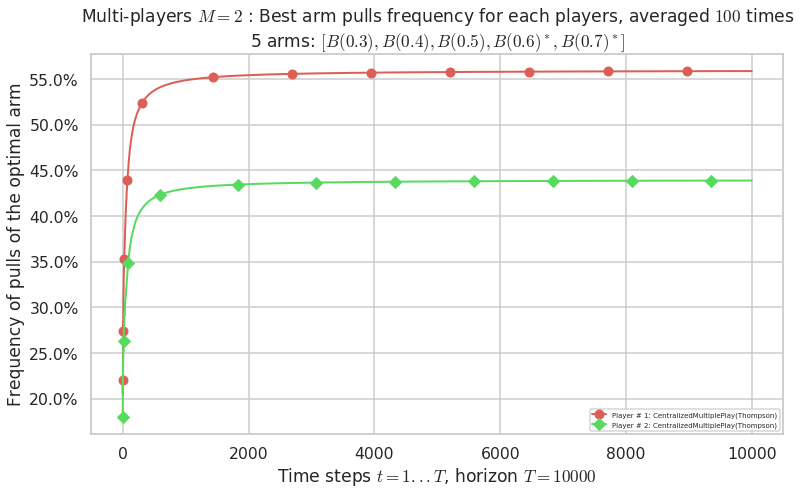


Final ranking for this environment # 0 : CentralizedIMP(Thompson) ...
- Player # 2 / 2, CentralizedIMP(Thompson)	was ranked	1 / 2 for this simulation (last rewards = 6550.7).
- Player # 1 / 2, CentralizedIMP(Thompson)	was ranked	2 / 2 for this simulation (last rewards = 6346.3).


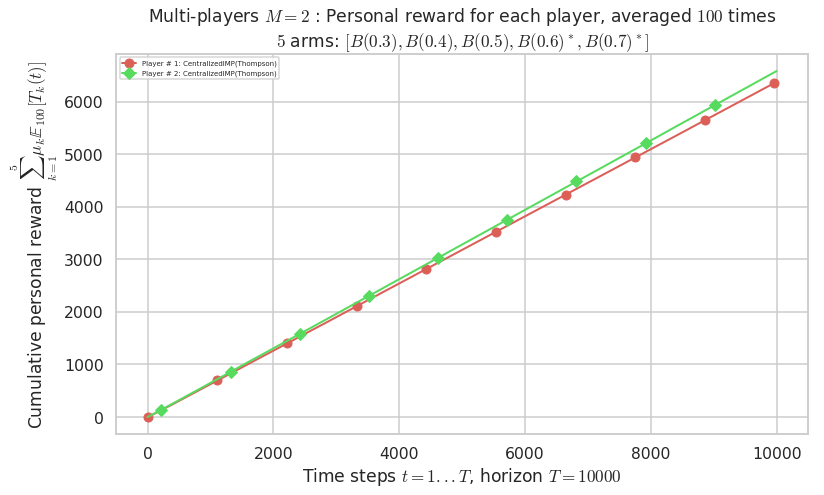

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


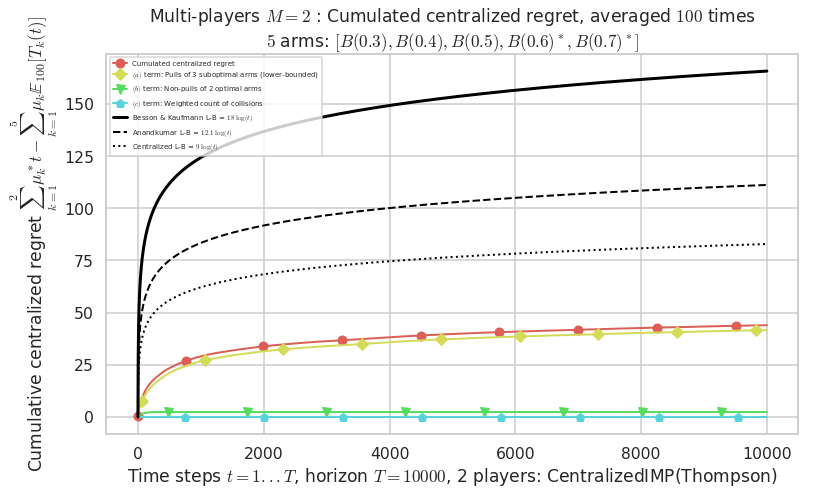

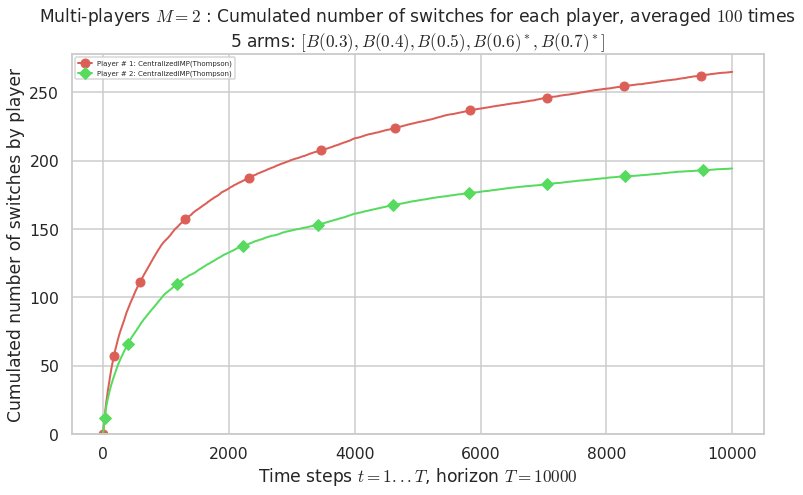

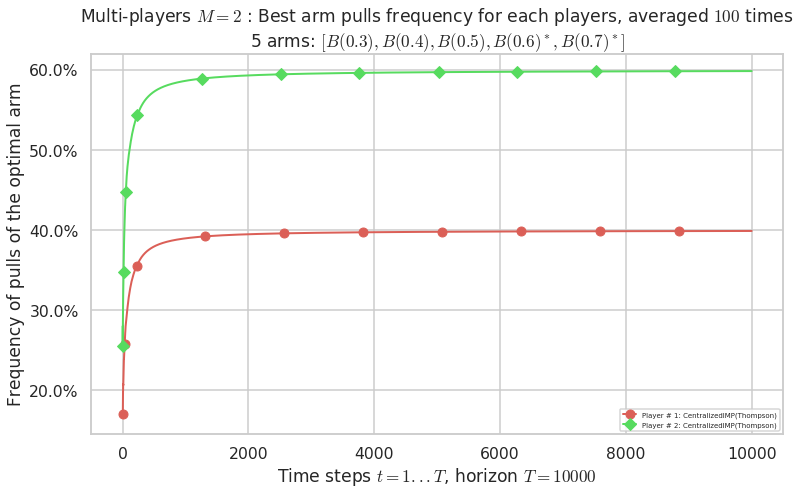

In [26]:
for playersId in tqdm(range(len(evs)), desc="Policies"):
    evaluation = evaluators[0][playersId]
    plotAll(evaluation, 0)

### Second problem
$\mu = [0.1, 0.3, 0.5, 0.7, 0.9]$ was an easier Bernoulli problem, with larger gap $\Delta = 0.2$.


Final ranking for this environment # 1 : CentralizedMultiplePlay(UCB($\alpha=1$)) ...
- Player # 1 / 2, CentralizedMultiplePlay(UCB($\alpha=1$))	was ranked	1 / 2 for this simulation (last rewards = 8059.3).
- Player # 2 / 2, CentralizedMultiplePlay(UCB($\alpha=1$))	was ranked	2 / 2 for this simulation (last rewards = 7817.7).


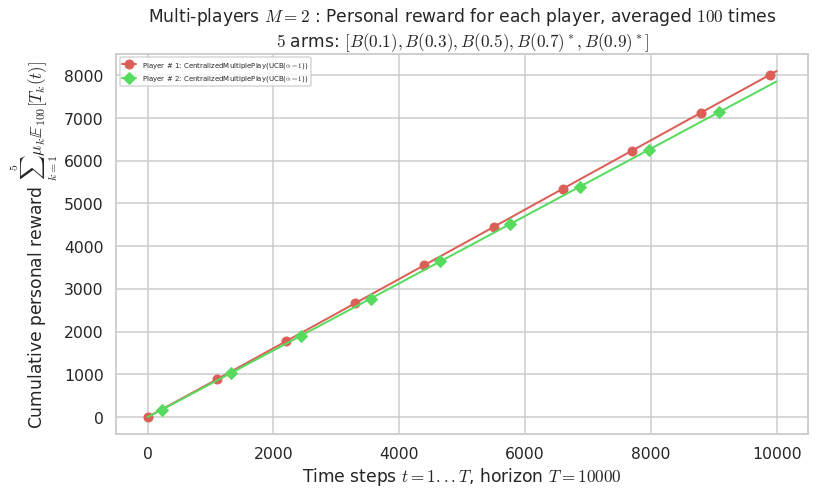

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


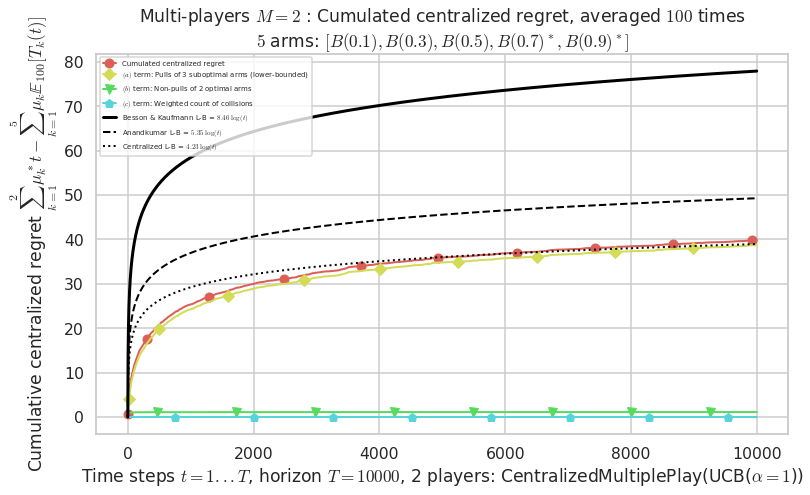

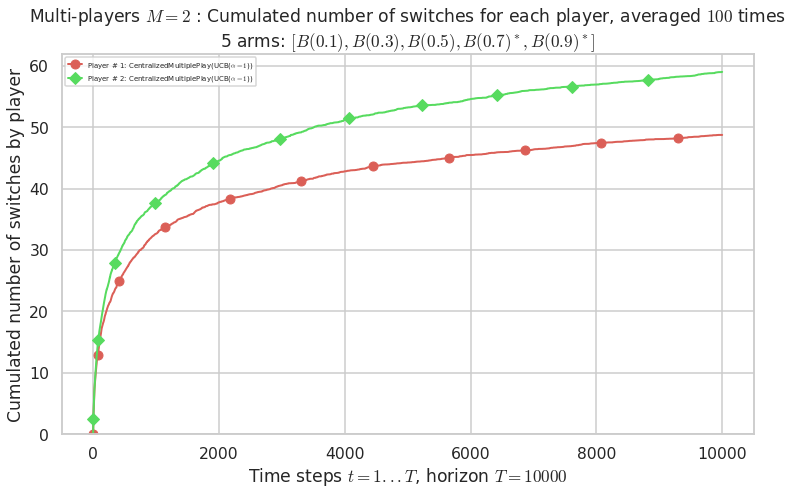

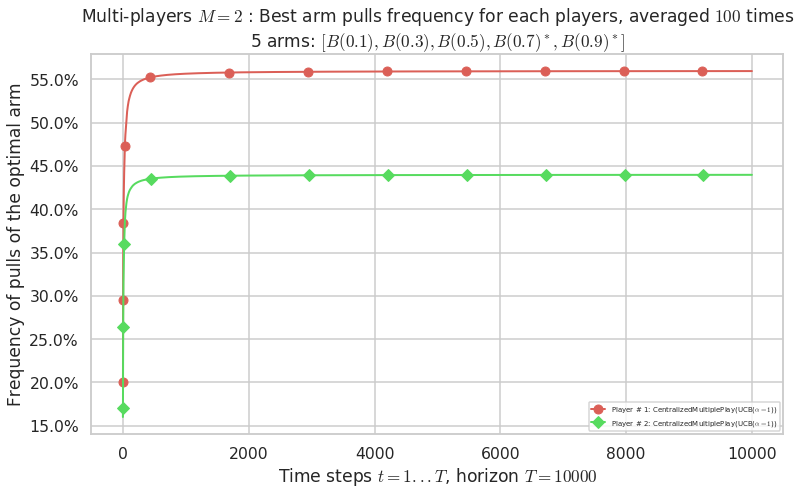


Final ranking for this environment # 1 : CentralizedIMP(UCB($\alpha=1$)) ...
- Player # 1 / 2, CentralizedIMP(UCB($\alpha=1$))	was ranked	1 / 2 for this simulation (last rewards = 8184.8).
- Player # 2 / 2, CentralizedIMP(UCB($\alpha=1$))	was ranked	2 / 2 for this simulation (last rewards = 7700).


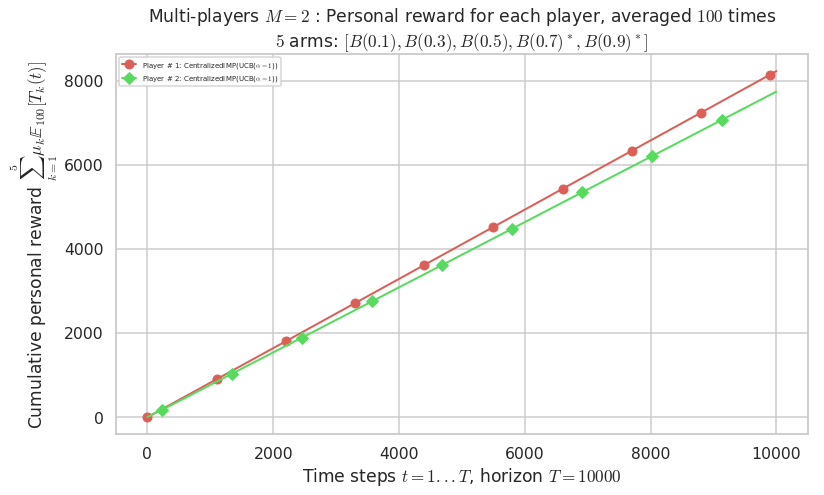

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


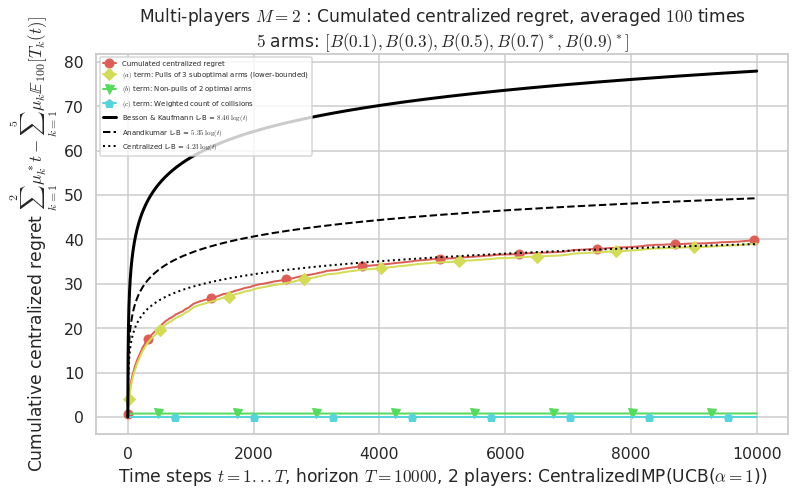

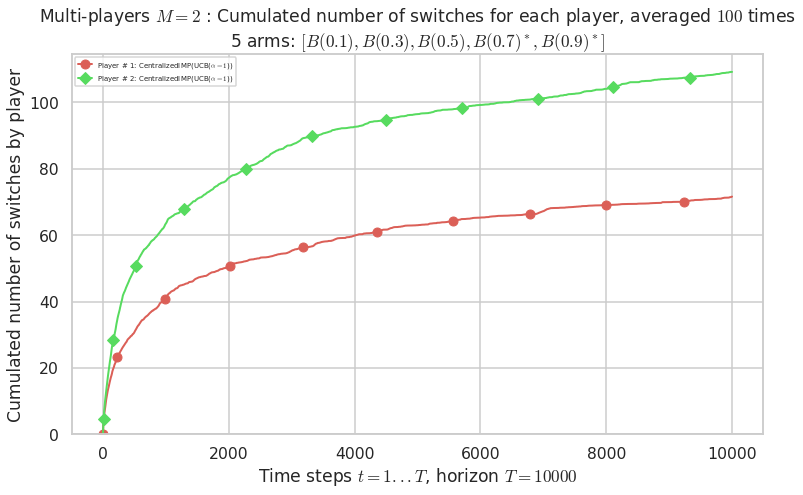

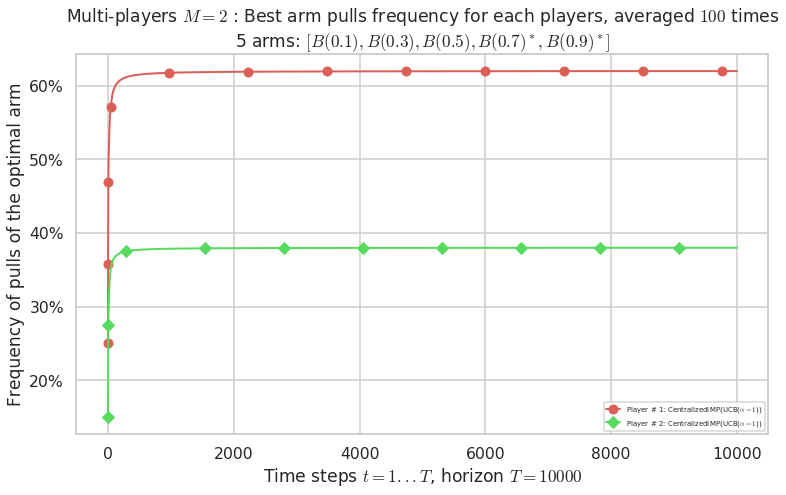


Final ranking for this environment # 1 : CentralizedMultiplePlay(Thompson) ...
- Player # 1 / 2, CentralizedMultiplePlay(Thompson)	was ranked	1 / 2 for this simulation (last rewards = 8084.4).
- Player # 2 / 2, CentralizedMultiplePlay(Thompson)	was ranked	2 / 2 for this simulation (last rewards = 7815.1).


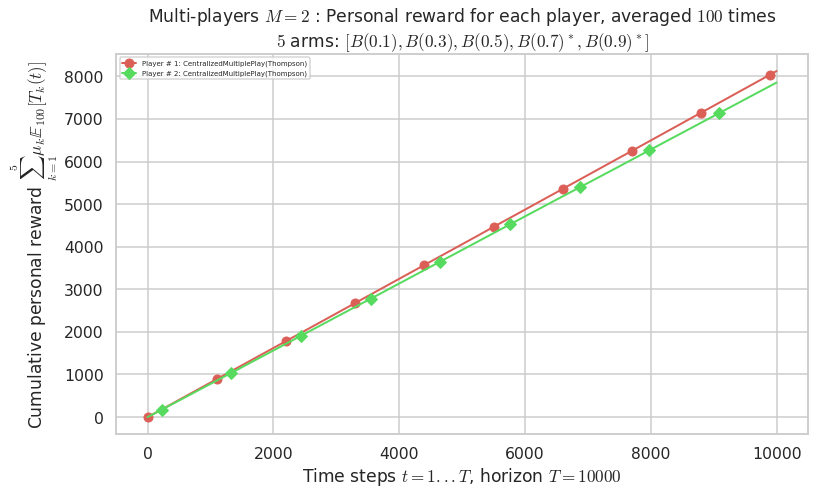

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


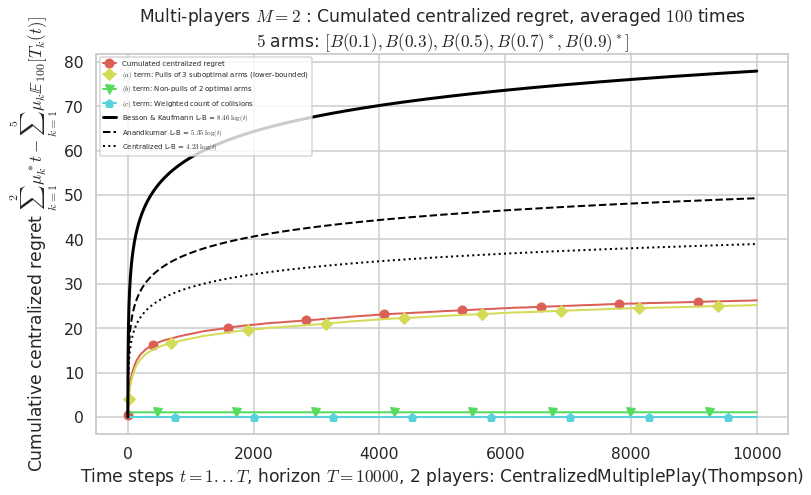

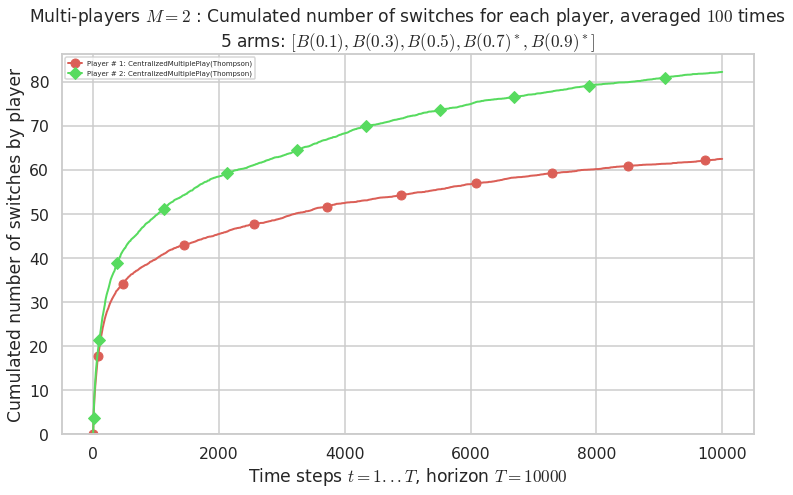

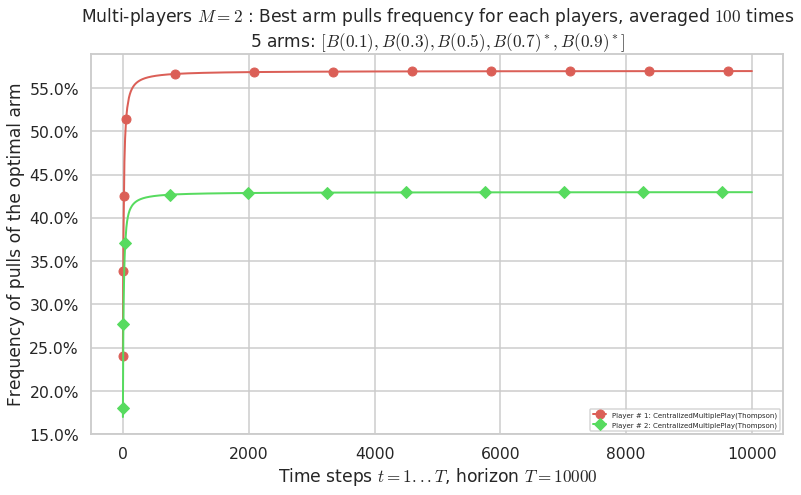


Final ranking for this environment # 1 : CentralizedIMP(Thompson) ...
- Player # 1 / 2, CentralizedIMP(Thompson)	was ranked	1 / 2 for this simulation (last rewards = 8008.4).
- Player # 2 / 2, CentralizedIMP(Thompson)	was ranked	2 / 2 for this simulation (last rewards = 7885.5).


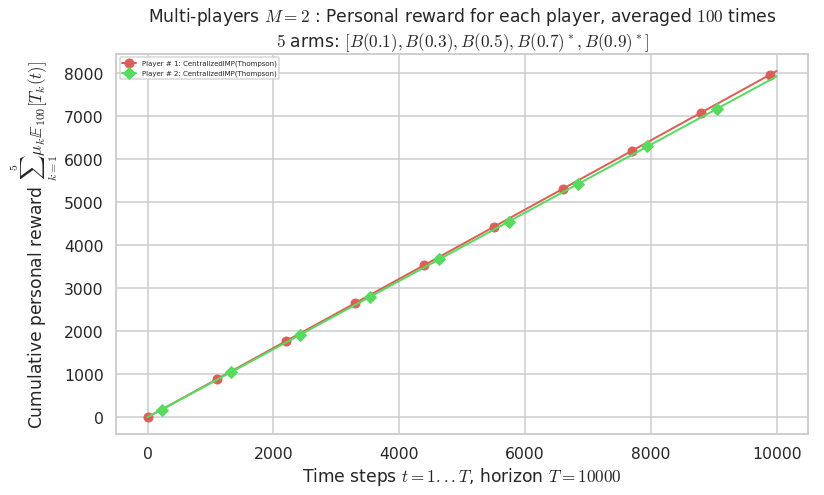

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


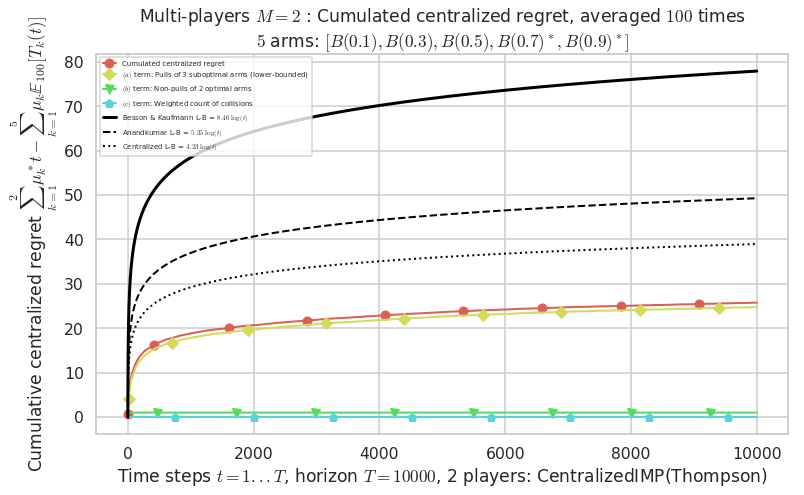

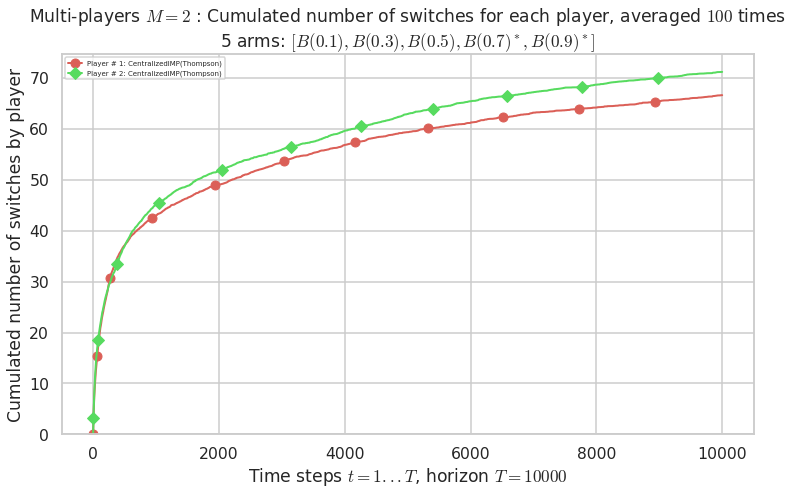

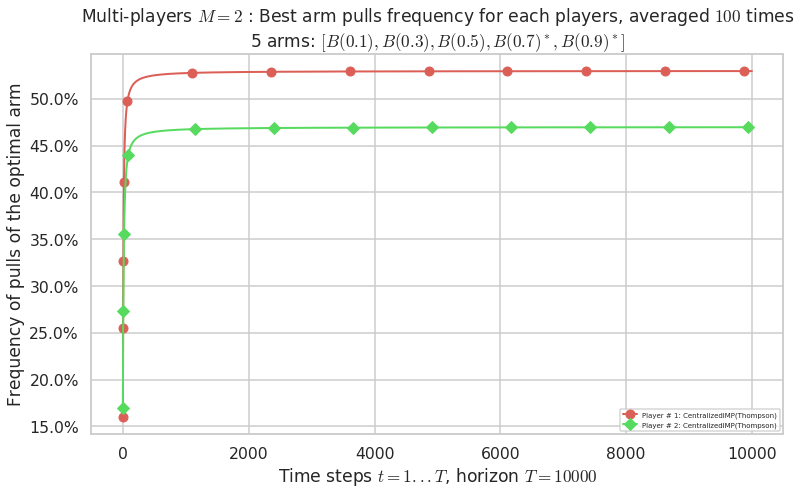

In [27]:
for playersId in tqdm(range(len(evs)), desc="Policies"):
    evaluation = evaluators[1][playersId]
    plotAll(evaluation, 1)

### Third problem
$\mu = [0.005, 0.01, 0.015, 0.84, 0.85]$ is an harder Bernoulli problem, as there is a huge gap between suboptimal and optimal arms.


Final ranking for this environment # 2 : CentralizedMultiplePlay(UCB($\alpha=1$)) ...
- Player # 2 / 2, CentralizedMultiplePlay(UCB($\alpha=1$))	was ranked	1 / 2 for this simulation (last rewards = 8399.9).
- Player # 1 / 2, CentralizedMultiplePlay(UCB($\alpha=1$))	was ranked	2 / 2 for this simulation (last rewards = 8392.3).


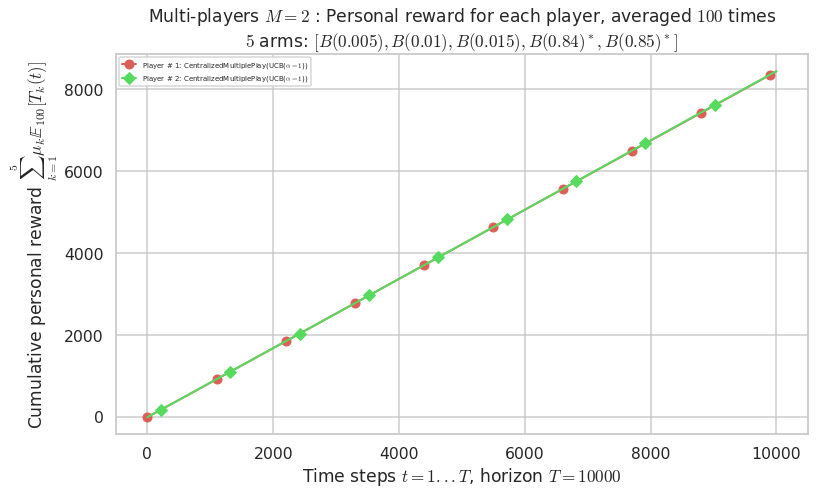

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


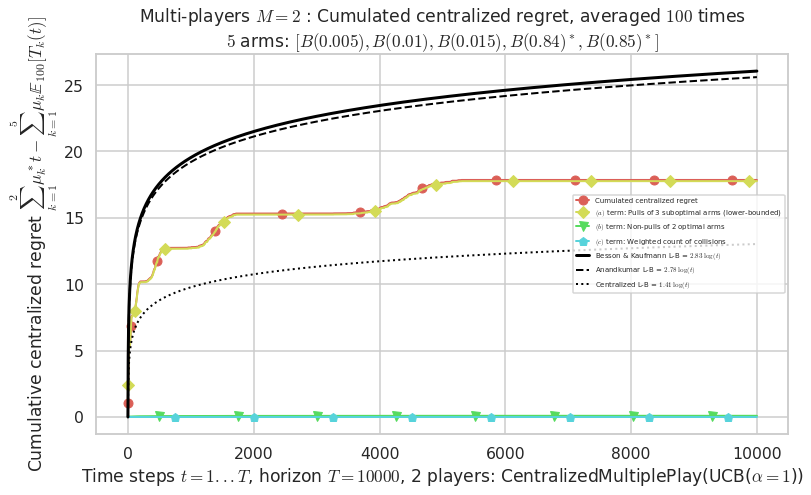

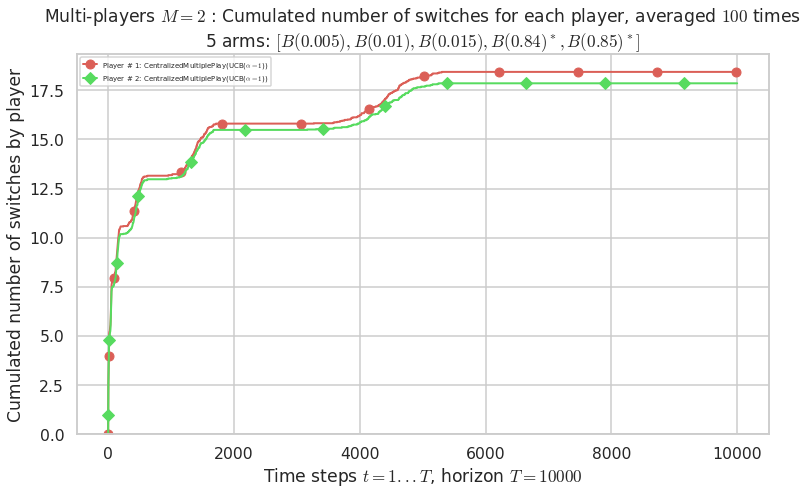

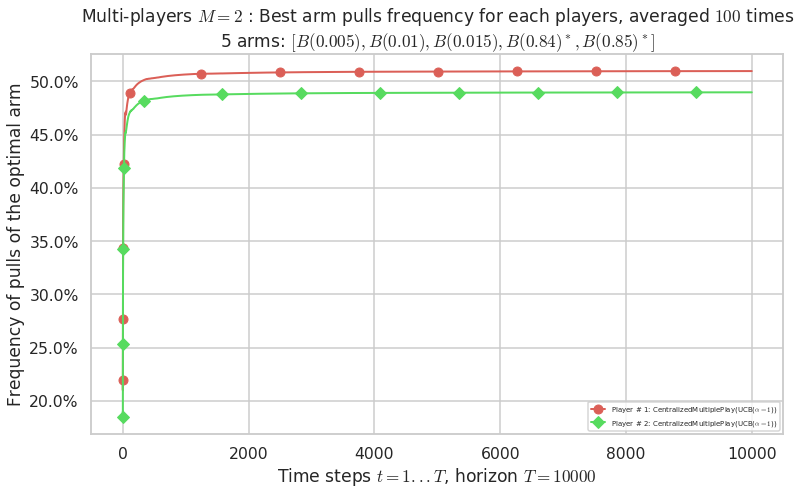


Final ranking for this environment # 2 : CentralizedIMP(UCB($\alpha=1$)) ...
- Player # 2 / 2, CentralizedIMP(UCB($\alpha=1$))	was ranked	1 / 2 for this simulation (last rewards = 8403.6).
- Player # 1 / 2, CentralizedIMP(UCB($\alpha=1$))	was ranked	2 / 2 for this simulation (last rewards = 8387.9).


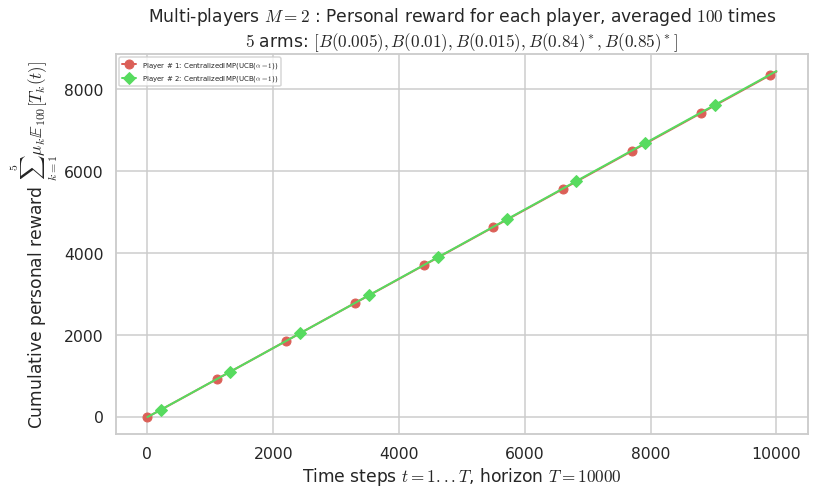

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


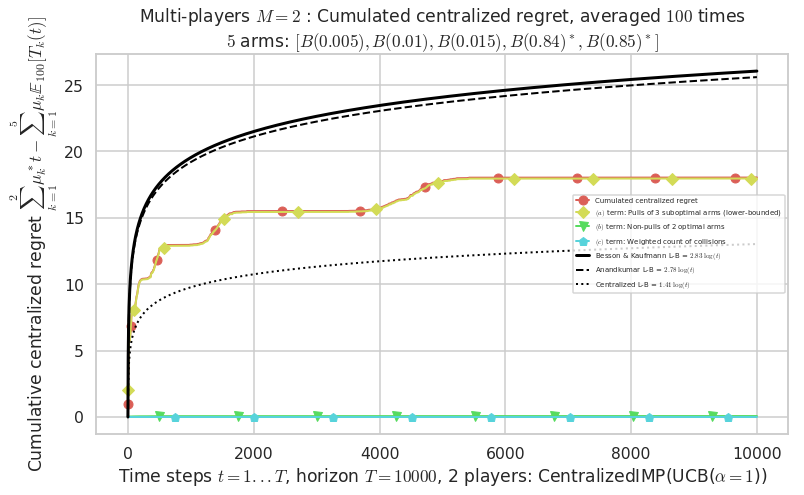

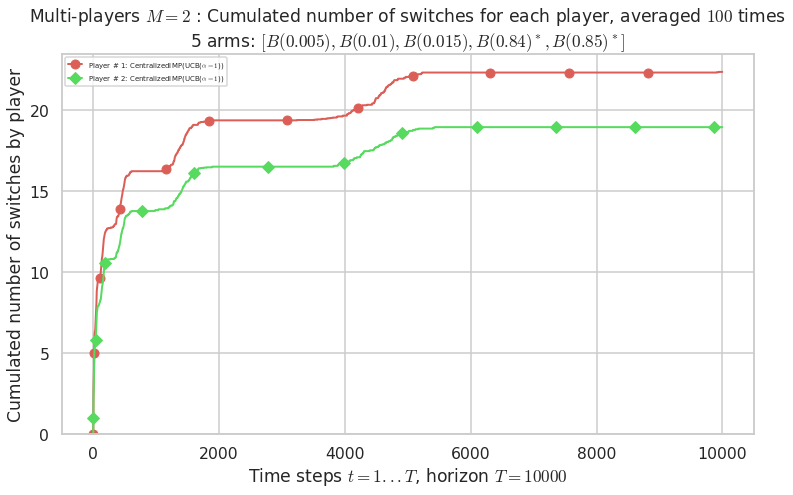

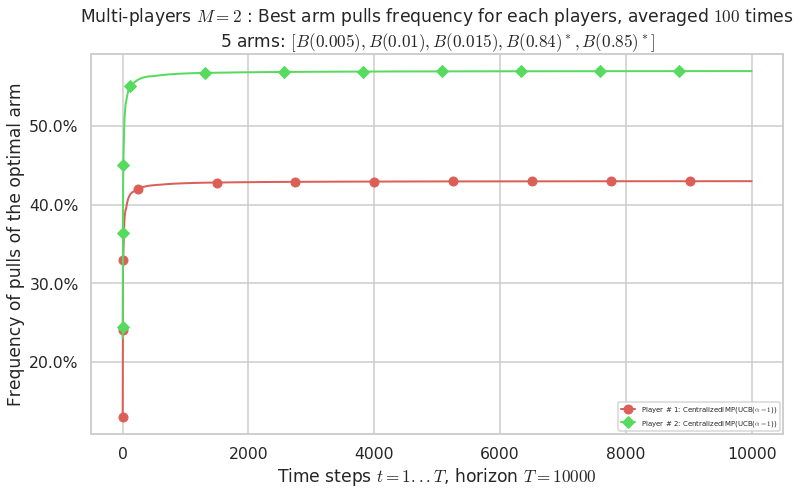


Final ranking for this environment # 2 : CentralizedMultiplePlay(Thompson) ...
- Player # 2 / 2, CentralizedMultiplePlay(Thompson)	was ranked	1 / 2 for this simulation (last rewards = 8414.9).
- Player # 1 / 2, CentralizedMultiplePlay(Thompson)	was ranked	2 / 2 for this simulation (last rewards = 8391).


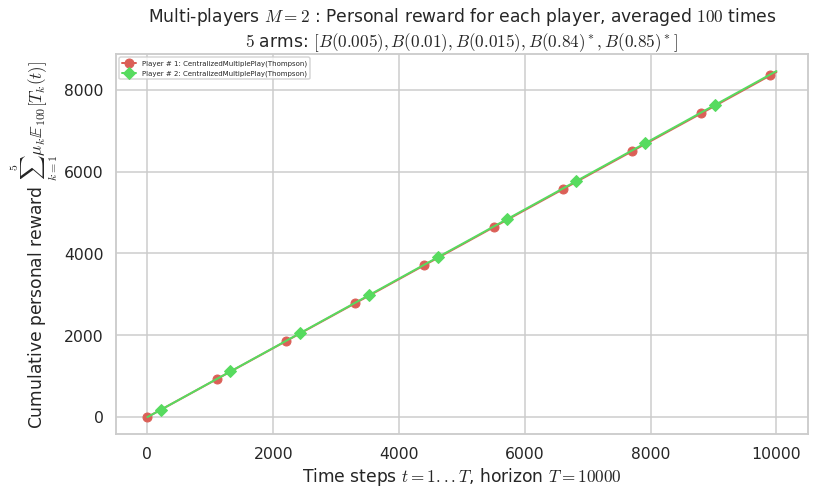

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


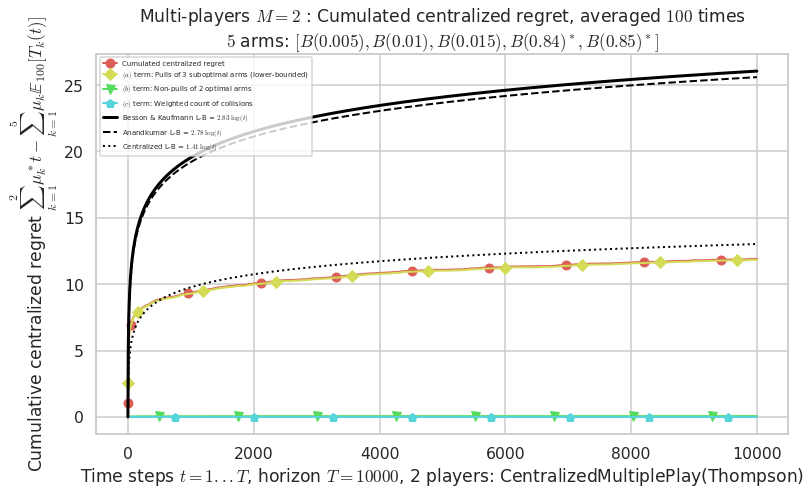

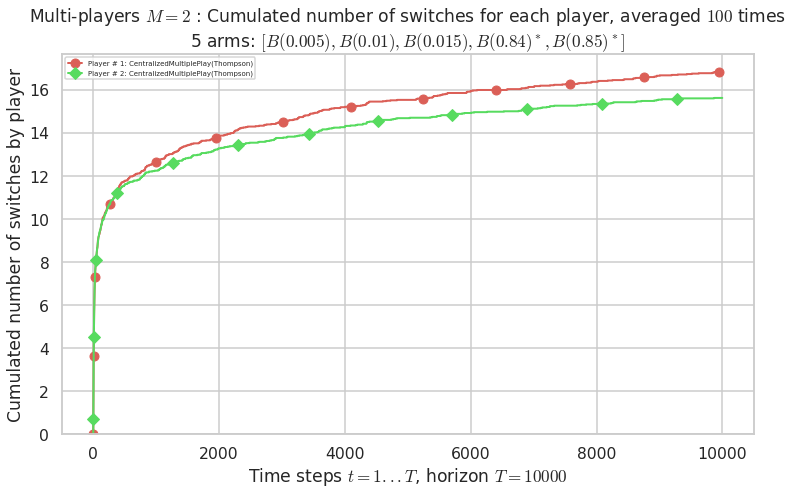

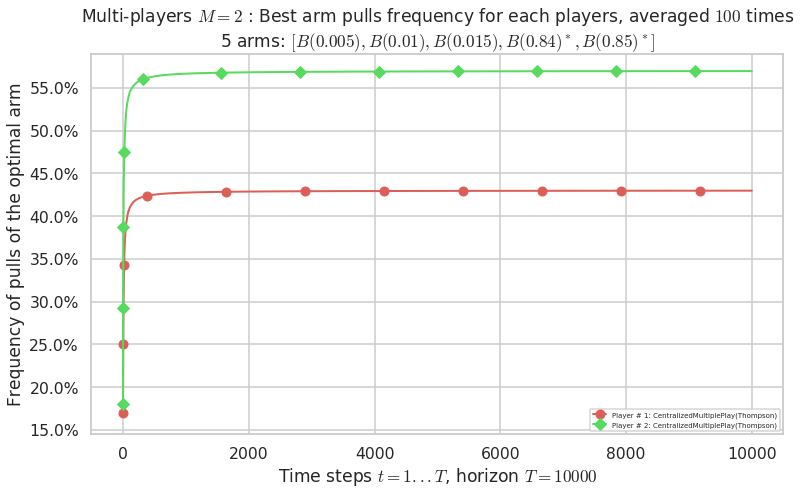


Final ranking for this environment # 2 : CentralizedIMP(Thompson) ...
- Player # 2 / 2, CentralizedIMP(Thompson)	was ranked	1 / 2 for this simulation (last rewards = 8404.6).
- Player # 1 / 2, CentralizedIMP(Thompson)	was ranked	2 / 2 for this simulation (last rewards = 8400.8).


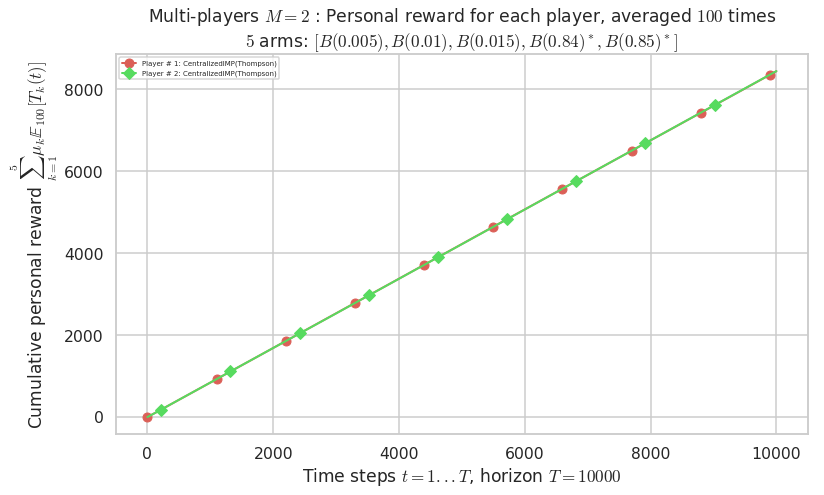

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


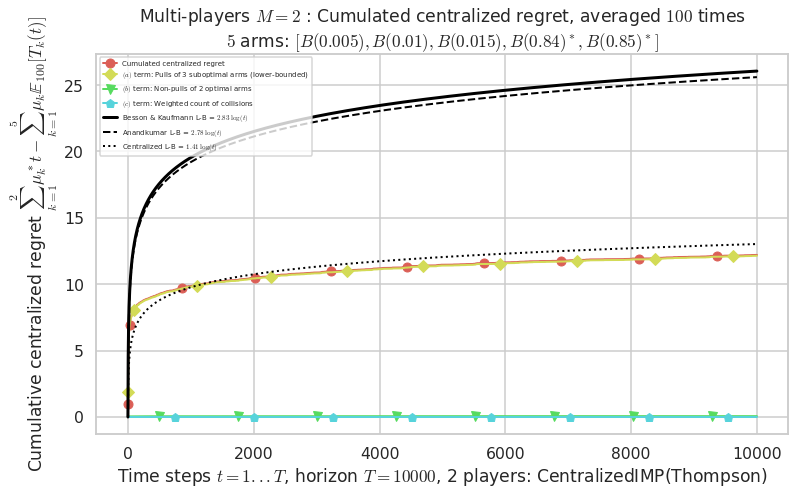

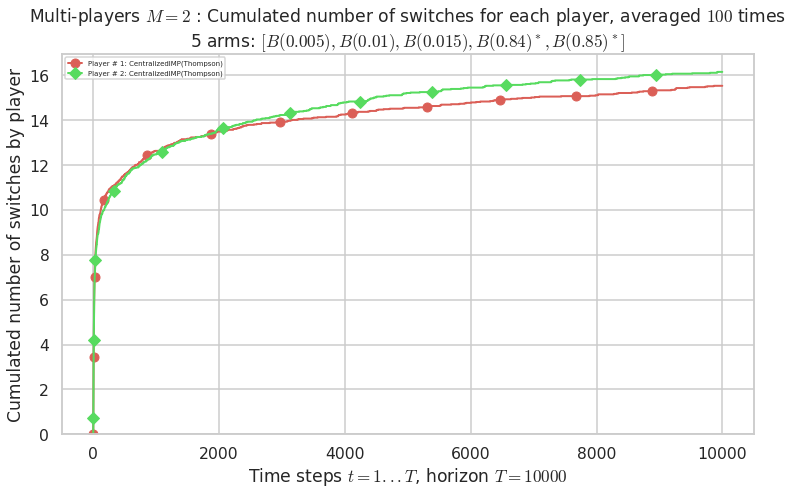

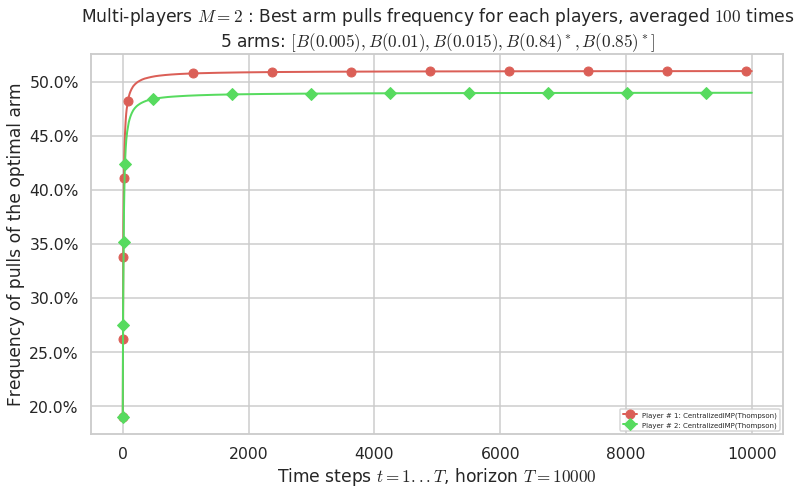

In [28]:
for playersId in tqdm(range(len(evs)), desc="Policies"):
    evaluation = evaluators[2][playersId]
    plotAll(evaluation, 2)

---
### Comparing their performances

In [29]:
def plotCombined(e0, eothers, envId):
    # Centralized regret
    e0.plotRegretCentralized(envId, evaluators=eothers)
    # Fairness
    e0.plotFairness(envId, fairness="STD", evaluators=eothers)
    # Number of switches
    e0.plotNbSwitchsCentralized(envId, cumulated=True, evaluators=eothers)
    # Number of collisions - not for Centralized* policies
    #e0.plotNbCollisions(envId, cumulated=True, evaluators=eothers)

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


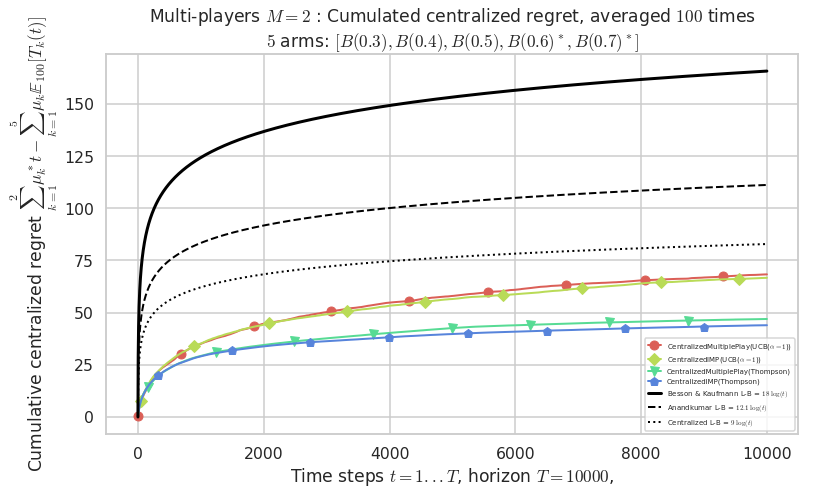

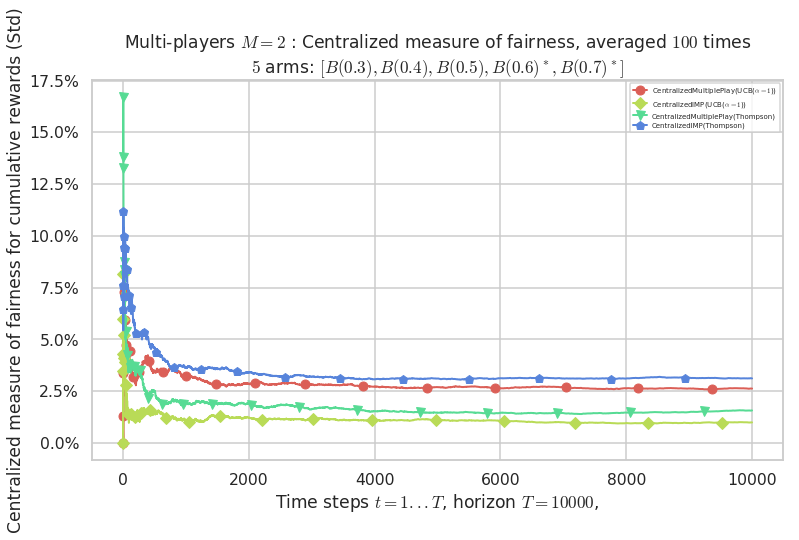

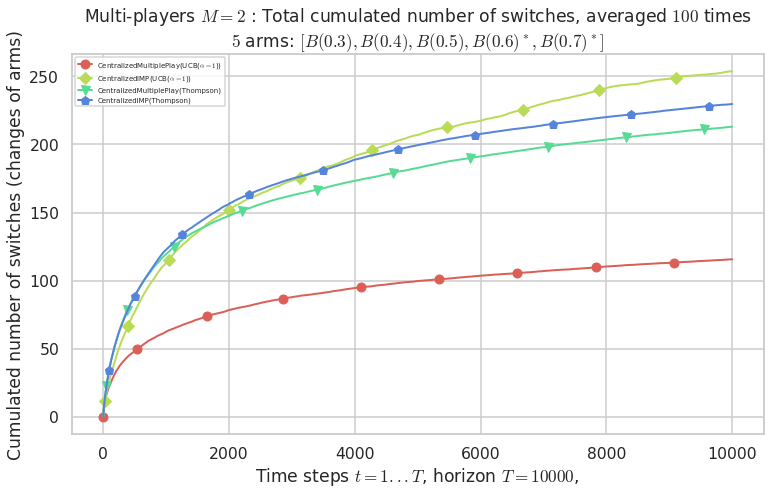

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


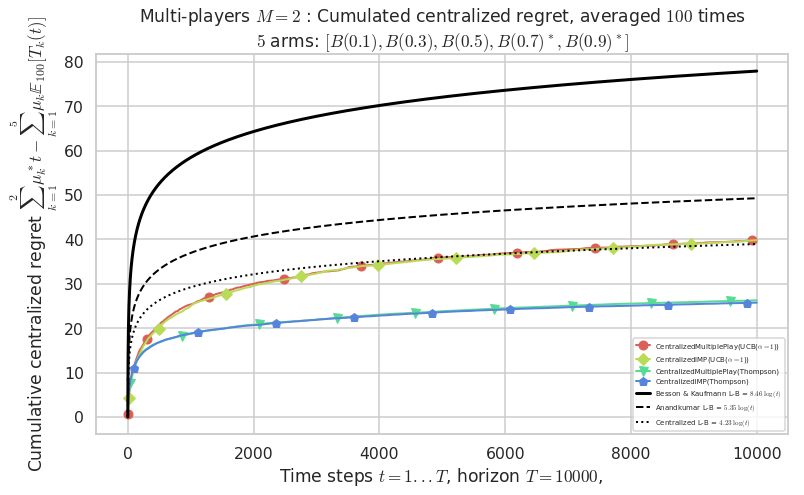

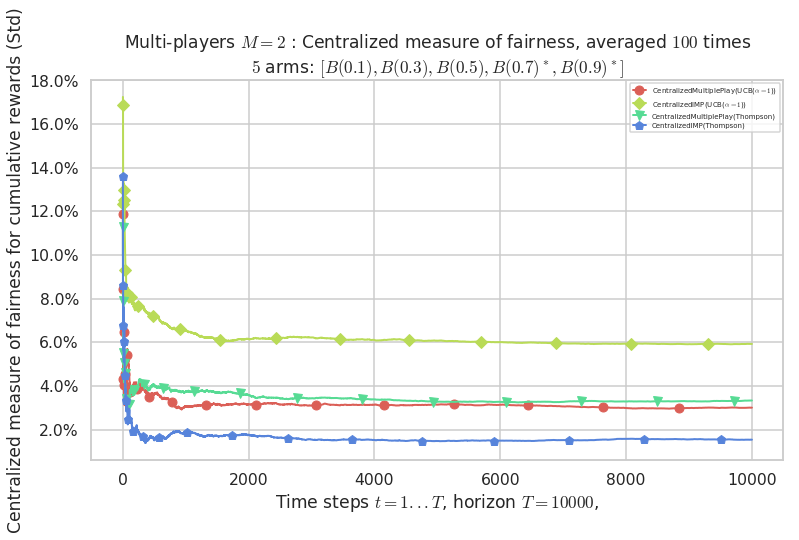

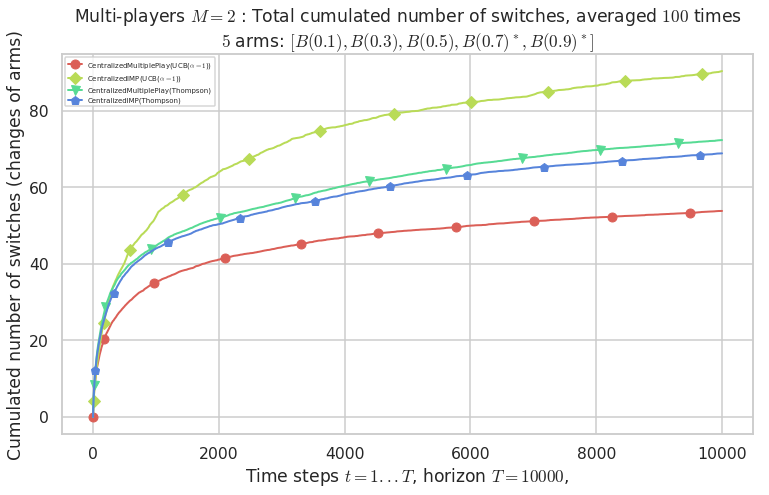

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


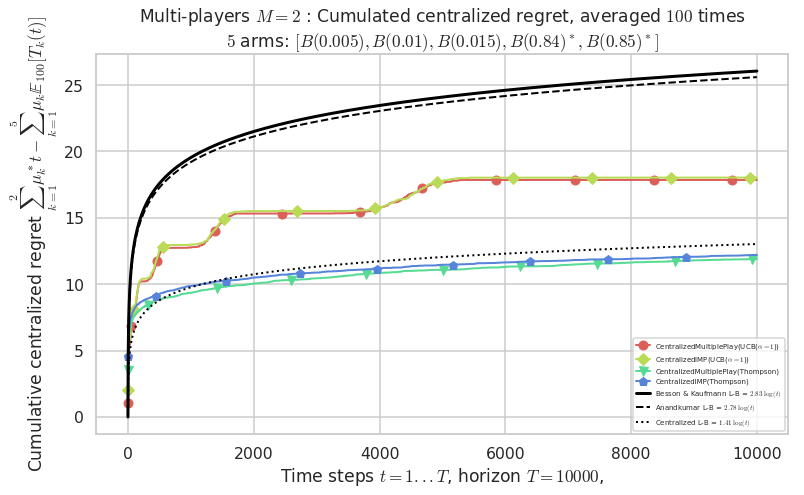

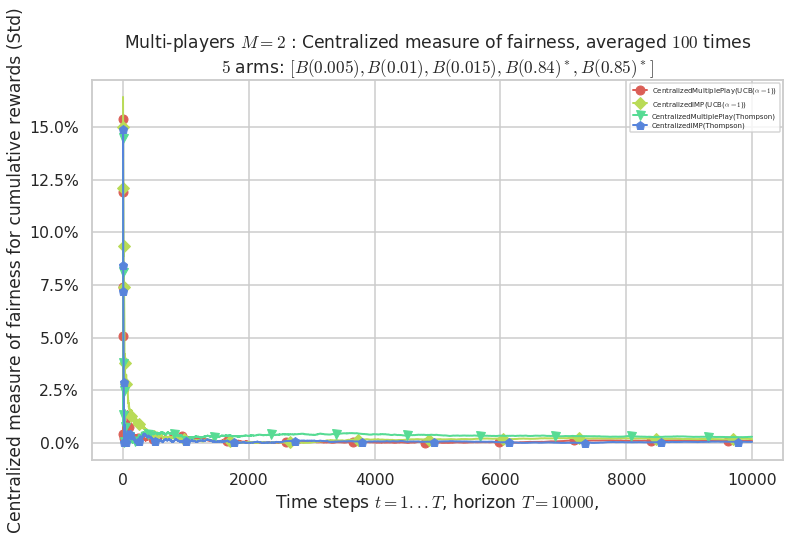

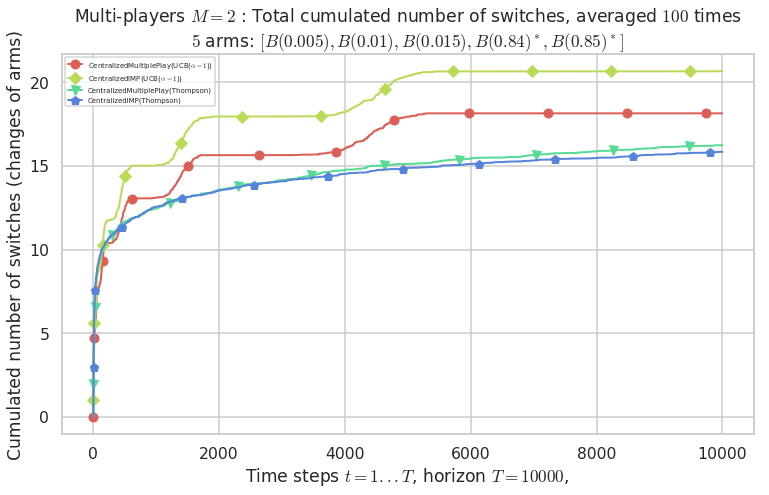

In [30]:
 N = len(configuration["environment"])
for envId, env in enumerate(configuration["environment"]):
    e0, eothers = evaluators[envId][0], evaluators[envId][1:]
    plotCombined(e0, eothers, envId)

---
> That's it for this demo!